In [16]:
import numpy as np
import os
import time
import random
import torch
from Model import Market_Env, portfolios_to_csv

from TD3 import utils
from TD3 import TD3
from TD3 import OurDDPG
from TD3 import DDPG


In [17]:
policy_name="TD3"

model_file = f"./models/{policy_name}_latest"
fund_return_src = r'./data/Monthly_Fund_Return_Selected.csv'
feature_src = r'./data/FEATURE.csv'
fund_map_src =r'./data/FUND_MAP_SELECTED.csv'

env =Market_Env(feature_src,fund_map_src,fund_return_src)

# Set seeds
rand_seed =random.randint(0x00000000,0xFFFFFFFF)
env.seed(rand_seed)
torch.manual_seed(rand_seed)
np.random.seed(rand_seed)

state_dim = env.state_dim
action_dim = env.action_dim
max_action = env.max_action
policy_noise =0.2
noise_clip = 0.5
policy_freq =2

kwargs = {
    "state_dim": state_dim,
    "action_dim": action_dim,
    "max_action": max_action,
    "discount": 0.9,
    "tau": 0.005,
}

if (policy_name=="TD3"):
    kwargs["policy_noise"] = policy_noise * max_action
    kwargs["noise_clip"] = noise_clip * max_action
    kwargs["policy_freq"] = policy_freq
    policy = TD3.TD3(**kwargs)
    policy.load(model_file)
elif(policy_name=="DDPG"):
    policy = OurDDPG.DDPG(**kwargs)
    policy.load(model_file)


In [19]:
state, done = env.reset(validation=True), False
env.start_year =2017
env.start_month =1
while not done:
    action = policy.select_action(np.array(state))
    #print(np.array(state))
    #print(action)
    action = action+0*np.random.randn(len(action))
    state, reward, done = env.step(action)
    #print(reward)
    time.sleep(.1)
print (len(env.portfolios))
portfolios_to_csv(env.portfolios,2017,1,f'{policy_name}_portfolios.csv',)

30


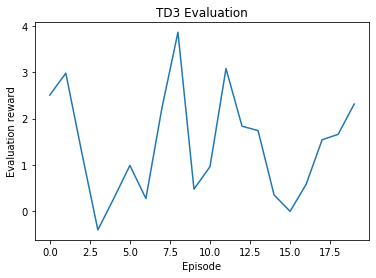

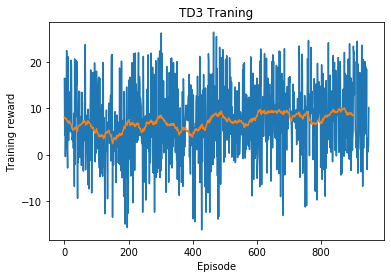

In [25]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

evaluation = f'./results/{policy_name}_28500_evaluations.npy'
reward = f'./results/{policy_name}_28500_episode_rewards.npy'
evaluation = np.load(evaluation)
reward = np.load(reward)



fig = plt.figure()
ax = fig.add_subplot()
ax.set_title(f'{policy_name} Evaluation')
ax.set_xlabel('Episode')
ax.set_ylabel('Evaluation reward')
ax.plot(evaluation)
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title(f'{policy_name} Traning')
ax.set_xlabel('Episode')
ax.set_ylabel('Training reward')
ax.plot(reward)
ax.plot(moving_average(reward,50))

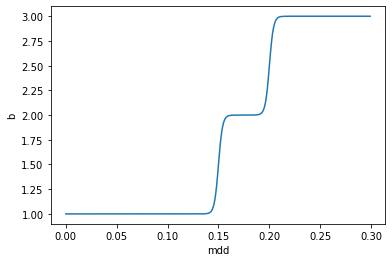

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,0.3,0.001)   # start,stop,step
y = 1+1/(1+np.exp(-(x-0.15)*500))+1/(1+np.exp(-(x-0.2)*500))

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('mdd')
ax.set_ylabel('b')
ax.plot(x,y)
plt.show()